In [1]:
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM
from tqdm import tqdm
import seaborn as sns

In [2]:
def extract_weights_from_hf_checkpoint(checkpoint_path, device='cpu', window=1000):
    model = AutoModelForCausalLM.from_pretrained(
        checkpoint_path,
        torch_dtype=torch.float16,
        device_map=device,
        trust_remote_code=True,
    )
    all_weights = []
    for param in model.parameters():
        all_weights.append(param.detach().cpu().flatten())
    all_weights = torch.cat(all_weights).numpy()
    sampled_weights = all_weights[::window].copy() # For memory efficiency
    del all_weights, model
    return sampled_weights

def create_weight_matrix(base_paths, checkpoint_numbers, window=1000):
    all_weights = []
    for base_path in tqdm(base_paths):
        for cp_num in checkpoint_numbers:
            cp_path = f"{base_path}/checkpoint-{cp_num}"
            weights = extract_weights_from_hf_checkpoint(cp_path, window=window)
            all_weights.append(weights)
    return np.stack(all_weights)

In [3]:
base_paths = ["/raid/s3/opengptx/mfrey/instruct/checkpoints_sft/full_code", "/raid/s3/opengptx/mfrey/instruct/checkpoints_sft/full_general", 
              "/raid/s3/opengptx/mfrey/instruct/checkpoints_sft/full_math", "/raid/s3/opengptx/mfrey/instruct/checkpoints_sft/full_mix"]
window = 1000
ws_full = create_weight_matrix(base_paths, checkpoint_numbers=range(5000, 100000, 5000), window=window)
# Save in /raid/s3/opengptx/mfrey/cp_analysis/dim_reduction with window parameter 
np.save(f"/raid/s3/opengptx/mfrey/cp_analysis/dim_reduction/weight_matrix_codegeneralmathmix_window{window}.npy", ws_full)

  0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:22<04:07, 82.64s/it]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

 50%|█████     | 2/4 [02:41<02:41, 80.64s/it]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

 75%|███████▌  | 3/4 [03:59<01:19, 79.24s/it]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [05:16<00:00, 79.12s/it]


In [4]:
ws_full.shape

(76, 9035080)

---

In [6]:
pca = PCA(n_components=50)
data_reduced = pca.fit_transform(ws_full)

# Then apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(data_reduced)

In [ ]:
pca = PCA(n_components=250)
coords_2d = pca.fit_transform(ws_full)

In [ ]:
tsne = TSNE(n_components=2)
tsne_2d = tsne.fit_transform(ws_full)

In [7]:
dataset_names = ["full_code", "full_general", "full_math", "full_mix"]
checkpoint_numbers=range(5000, 100000, 5000)

In [8]:
def plot_training_trajectories(coords_2d, dataset_names, checkpoint_numbers, 
                              benchmark_scores=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = ['red', 'blue', 'green', 'orange']  # for each dataset
    
    for i, dataset in enumerate(dataset_names):
        start_idx = i * len(checkpoint_numbers)
        end_idx = (i + 1) * len(checkpoint_numbers)
        
        trajectory = coords_2d[start_idx:end_idx]
        
        # Plot trajectory
        ax.plot(trajectory[:, 0], trajectory[:, 1], 
               color=colors[i], alpha=0.7, linewidth=2, label=dataset)
        
        # Mark checkpoints
        if benchmark_scores:
            scores = benchmark_scores[start_idx:end_idx]
            scatter = ax.scatter(trajectory[:, 0], trajectory[:, 1], 
                               c=scores, cmap='viridis', s=50, 
                               edgecolors=colors[i], linewidth=1)
        else:
            ax.scatter(trajectory[:, 0], trajectory[:, 1], 
                      c=colors[i], s=50, alpha=0.8)
    
    ax.legend()
    #plt.colorbar(scatter, label='Benchmark Score')
    plt.title('Model Training Trajectories in Weight Space')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

def plot_training_trajectories(coords_2d, dataset_names, checkpoint_numbers, 
                              benchmark_scores=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    base_colors = ['red', 'blue', 'green', 'orange']  # for each dataset
    
    for i, dataset in enumerate(dataset_names):
        start_idx = i * len(checkpoint_numbers)
        end_idx = (i + 1) * len(checkpoint_numbers)
        
        trajectory = coords_2d[start_idx:end_idx]
        base_color = base_colors[i]
        
        # Create gradient colors from light to dark
        n_points = len(trajectory)
        alphas = np.linspace(0.3, 1.0, n_points)  # Light to dark
        
        # Plot trajectory segments with gradient
        for j in range(len(trajectory) - 1):
            ax.plot(trajectory[j:j+2, 0], trajectory[j:j+2, 1], 
                   color=base_color, alpha=alphas[j], linewidth=3)
        
        # Mark start and end clearly
        ax.scatter(trajectory[0, 0], trajectory[0, 1], 
                  color=base_color, s=100, marker='o', alpha=0.5, 
                  label=f'{dataset} (start)')
        ax.scatter(trajectory[-1, 0], trajectory[-1, 1], 
                  color=base_color, s=150, marker='*', 
                  label=f'{dataset} (end)')
        
        # Overlay benchmark scores if provided
        if benchmark_scores:
            scores = benchmark_scores[start_idx:end_idx]
            scatter = ax.scatter(trajectory[:, 0], trajectory[:, 1], 
                               c=scores, cmap='viridis', s=30, 
                               edgecolors=base_color, linewidth=1, alpha=0.8)
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if benchmark_scores is not None:
        plt.colorbar(scatter, label='Benchmark Score')
    #plt.title('Model Training Trajectories in Weight Space\n(Light to Dark = Early to Late)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    sns.despine()
    plt.show()

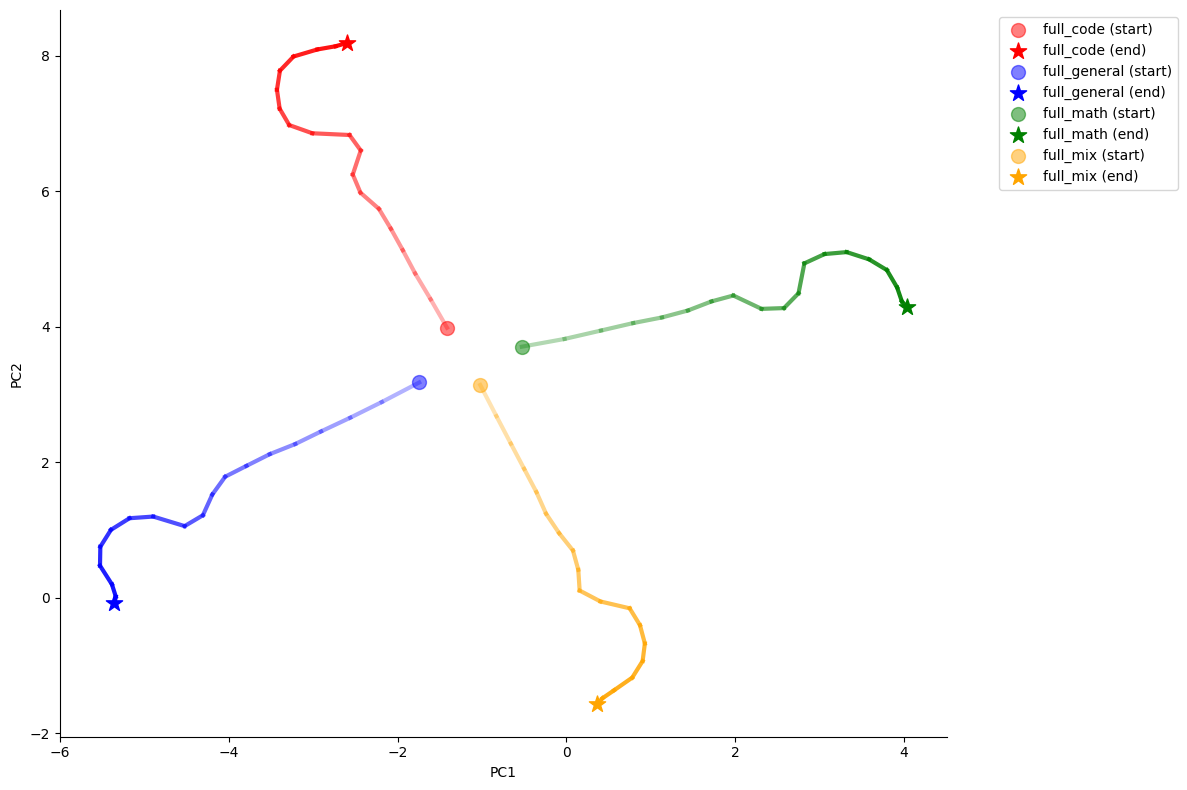

In [9]:
plot_training_trajectories(embeddings_2d, dataset_names, checkpoint_numbers)

In [11]:
data_reduced.shape

(76, 50)

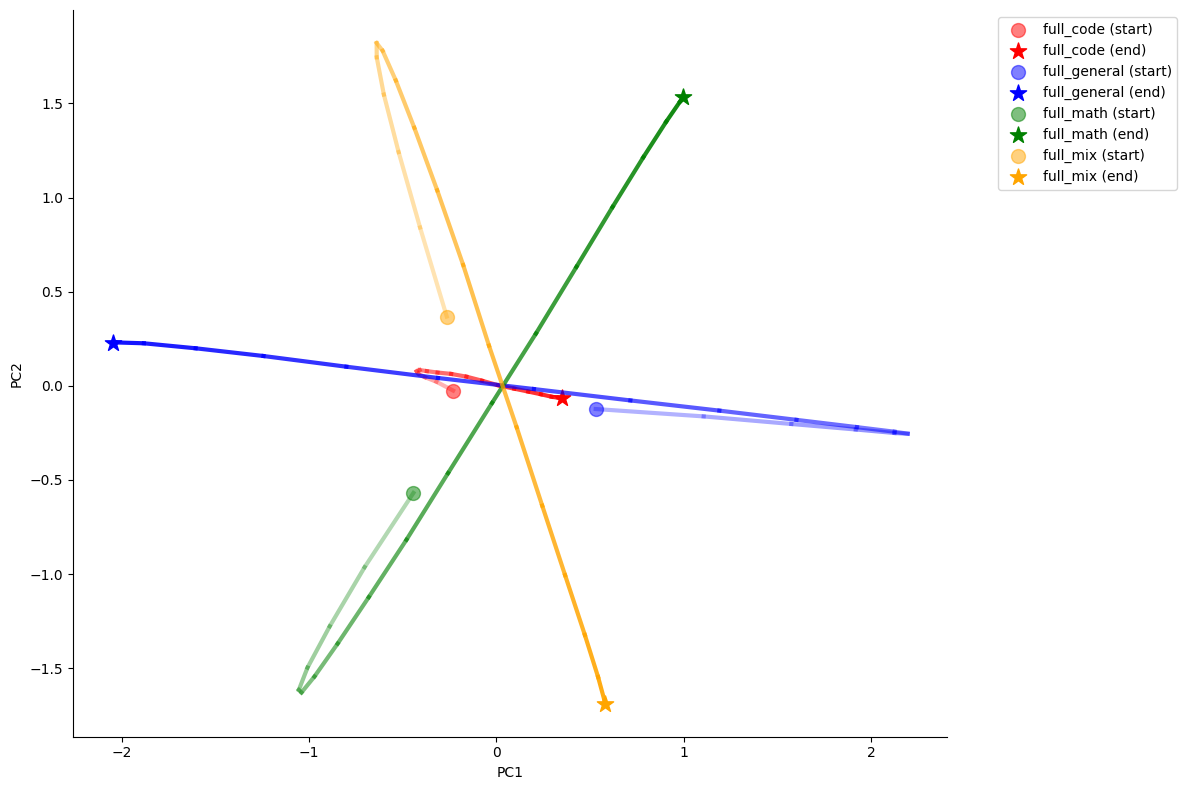

In [20]:
plot_training_trajectories(data_reduced[:,[4,5]], dataset_names, checkpoint_numbers)

In [21]:
from scipy.interpolate import griddata

def create_performance_contours(coords_2d, benchmark_scores):
    # Create regular grid
    xi = np.linspace(coords_2d[:, 0].min(), coords_2d[:, 0].max(), 100)
    yi = np.linspace(coords_2d[:, 1].min(), coords_2d[:, 1].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate performance scores
    zi = griddata((coords_2d[:, 0], coords_2d[:, 1]), benchmark_scores, 
                  (xi, yi), method='cubic')
    
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xi, yi, zi, levels=20, cmap='RdYlBu')
    plt.colorbar(contour, label='Benchmark Score')
    
    # Overlay training trajectories
    plot_training_trajectories(coords_2d, dataset_names, checkpoint_numbers)

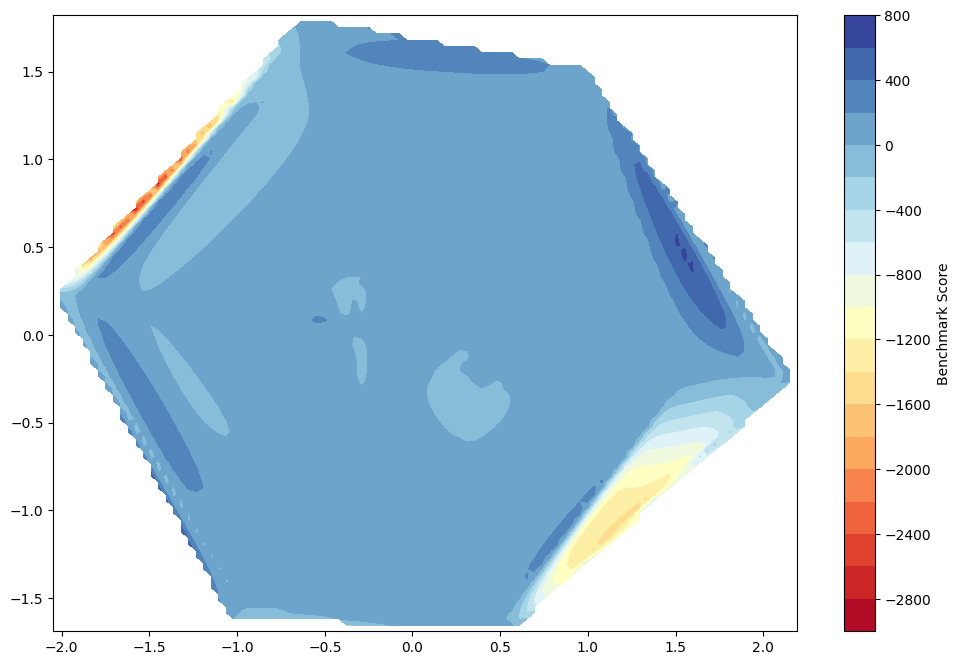

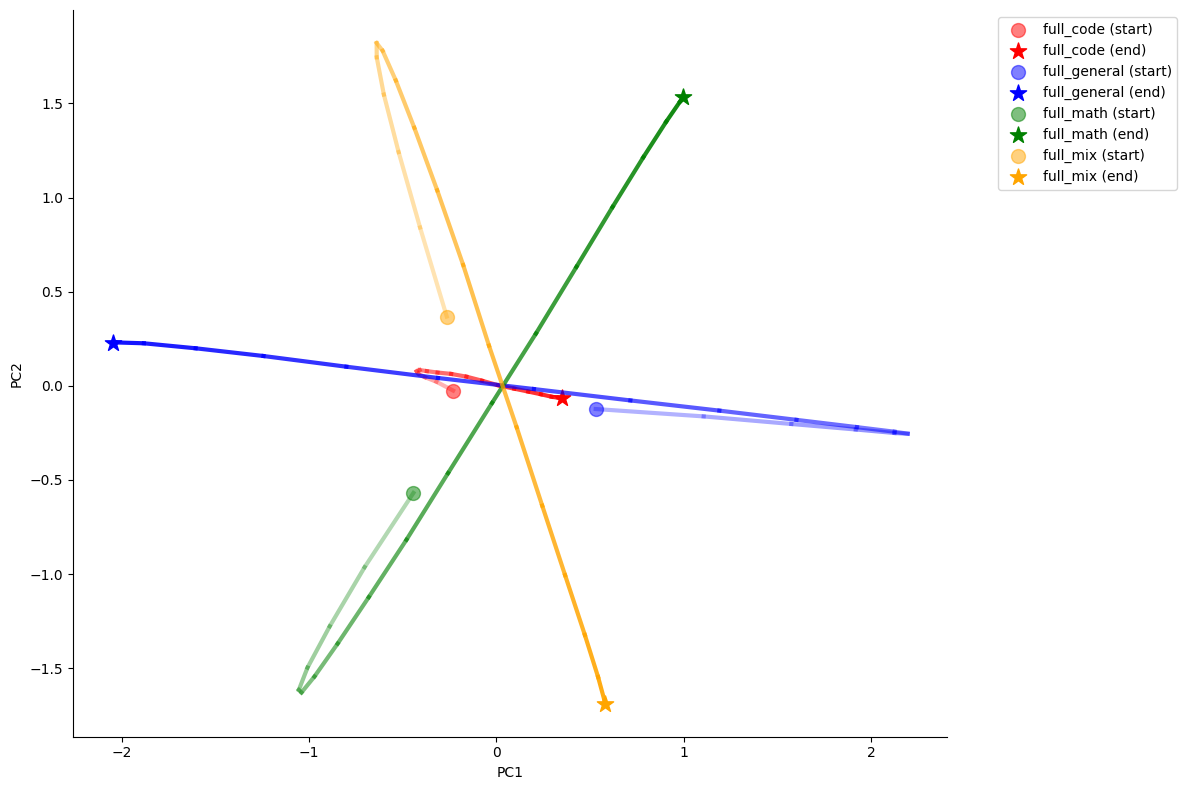

In [22]:
create_performance_contours(data_reduced[:,[4,5]], np.random.rand(ws_full.shape[0])*100)  # Example with random scores